In [4]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import colorama
from colorama import Fore, Back, Style
#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [6]:
data =  pd.read_csv('loan_sanction_train.csv')

In [24]:
df = data.copy()

In [11]:
print(Style.BRIGHT+'DataFrame:'+ Style.RESET_ALL)
print(Style.BRIGHT+'-----------'+ Style.RESET_ALL)
df.head().style.set_properties(**{'background-color': '#ffffff' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

DataFrame:
-----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [12]:
print(Style.BRIGHT+ 'Summary of Home Loan Data:' + Style.RESET_ALL)
print(Style.BRIGHT+ '--------------------------' + Style.RESET_ALL)
print(Fore.BLACK+ Style.BRIGHT+ 'Gender' + Style.RESET_ALL+'           :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (Male, Female)')
print(Fore.BLACK+ Style.BRIGHT+ 'Married' + Style.RESET_ALL+'          :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (No, Yes)')
print(Fore.BLACK+ Style.BRIGHT+ 'Dependents' + Style.RESET_ALL+'       :',\
      Fore.RED+ Style.BRIGHT+ str(4) + Style.RESET_ALL + ' (0, 1, 2, 3+)')
print(Fore.BLACK+ Style.BRIGHT+ 'Education' + Style.RESET_ALL+'        :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (Graduate, Not Graduate)')
print(Fore.BLACK+ Style.BRIGHT+ 'Self_Employed' + Style.RESET_ALL+'    :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (No, Yes)')
print(Fore.BLACK+ Style.BRIGHT+ 'Credit_History' + Style.RESET_ALL+'   :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (1, 0)')
print(Fore.BLACK+ Style.BRIGHT+ 'Property_Area' + Style.RESET_ALL+'    :',\
      Fore.RED+ Style.BRIGHT+ str(3) + Style.RESET_ALL + ' (Urban, Rural, Semiurban)')
print(Fore.BLACK+ Style.BRIGHT+ 'Loan_Status' + Style.RESET_ALL+'      :',\
      Fore.RED+ Style.BRIGHT+ str(2) + Style.RESET_ALL + ' (Y, N)')

Summary of Home Loan Data:
--------------------------
Gender           : 2 (Male, Female)
Married          : 2 (No, Yes)
Dependents       : 4 (0, 1, 2, 3+)
Education        : 2 (Graduate, Not Graduate)
Self_Employed    : 2 (No, Yes)
Credit_History   : 2 (1, 0)
Property_Area    : 3 (Urban, Rural, Semiurban)
Loan_Status      : 2 (Y, N)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df = df.drop('Loan_ID',axis = 1)
#Colors used in the Notebook
colorsy =['#ee4035','#f37736', '#fdf498', '#7bc043', '#0392cf', '#008744', '#0057e7', '#d62d20', '#ffa700']
tricolor=['#7bc043','#0392cf', '#f37736']
doucolor=['#008744','#0057e7']
twocolor=['#7bc043','#f37736']

In [27]:
print(Style.BRIGHT+ 'Checking Null Values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
print(df.isnull().sum())

Checking Null Values:
---------------------
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [28]:
print(Style.BRIGHT+ 'All the Null values are dropped from the Dataset' + Style.RESET_ALL)
print('\n')
print(Style.BRIGHT+ 'Verifying Null Values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df =  df.fillna(df.mean())
df  = df.ffill().bfill()
df.isnull().sum()

All the Null values are dropped from the Dataset


Verifying Null Values:
---------------------


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

In [29]:
Education_loan_data=df[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Gender_loan_data=df[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Self_Employed_loan_data=df[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Credit_History_loan_data=df[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()


for col in ['Education','Gender','Self_Employed','Credit_History']:
  print('\n\n')
  df1=col+'_loan_data'
  df1 = pd.DataFrame(eval(df1))
  col_label = col.replace("_", " " )
  fig1=px.bar(data_frame=df1, x=col, y='Count', color='Loan_Status', barmode='group', color_discrete_sequence=tricolor, text_auto=True, template='simple_white')

  fig1.update_layout(yaxis_range=[0,350])  
  fig1.update_yaxes(showgrid=True)
  fig1.update_xaxes(showgrid=True)   
    
  fig1.update_layout(height=400,width=800,
      title=f'<b>{col_label} Vs Loan Status</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      title_xanchor="center",
      title_x=0.5,
      xaxis_title=f"<b>{col_label}</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Status</b>',
      legend_title_font_color="#000000",
      plot_bgcolor ='#ffffff'
  )


  fig1.show()

In [30]:
pa_loan_df = df[['Property_Area', 'LoanAmount']].groupby(['Property_Area']).agg({'Property_Area':'count', 'LoanAmount':'sum'})
pa_loan_df.columns = [ 'Loan_Count', 'Loan_Amount']
pa_loan_df.reset_index(inplace=True)

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'xy'},{'type':'Domain'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=['<b>Loan Count</b>', '<b>Loan Amount</b>'])



fig.add_trace(go.Bar(x=pa_loan_df['Property_Area'],y=pa_loan_df['Loan_Count'], text=pa_loan_df['Loan_Count'], 
                     marker_color=tricolor ),row=1,col=1)
fig.add_trace(go.Pie(labels=pa_loan_df['Property_Area'], values=pa_loan_df['Loan_Amount'],name='Loan_Amount', 
                     textinfo='percent+label+value', marker_colors=tricolor),row=1,col=2)

fig.update_layout(height=400,width=1000, 
                  title_text="<b>Property Area wise Loan Distribution</b>",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_family="Times New Roman",title_font_color="black",
                  title_font_size=20,
                  showlegend=False,
                  legend_bgcolor='#ffffff',
                  paper_bgcolor='#ffffff',
                  plot_bgcolor = '#ffffff')
fig.show()

In [32]:
fig=px.histogram(df.sort_values('Loan_Status', ascending=True), x='LoanAmount' , 
                 color='Loan_Status', nbins=50, text_auto=True, template='simple_white', 
                 color_discrete_sequence=['#7bc043','#008744'])

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True) 

fig.update_layout(bargap=0)
fig.update_layout(yaxis_range=[0,100])
fig.update_layout(xaxis_range=[0,700])

fig.update_layout(
    title='<b>Loan Amount Distribution (All Areas Togather)</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Amount</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>Loan Approved?</b>',
    legend_title_font_color='#000000',
    plot_bgcolor = '#ffffff'
)

In [33]:
for area in ['Urban','Rural','Semiurban'] :
  bins=50
  if area == 'Urban':
    bins=40

  print('\n\n')
  fig=px.histogram(df[df['Property_Area']==area].sort_values('Loan_Status', ascending=True),
                   x='LoanAmount' , color='Loan_Status', nbins=bins, text_auto=True, 
                   template='simple_white', color_discrete_map ={'Y':'#7bc043', 'N':'#f37736'}) 
  fig.update_layout(bargap=0)
  fig.update_layout(yaxis_range=[0,40])
  fig.update_layout(xaxis_range=[0,700])


  fig.update_yaxes(showgrid=True)
  fig.update_xaxes(showgrid=True) 

  fig.update_layout(
      title=f'<b>Loan Amount Distribution - {area} Area</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      xaxis_title="<b>Amount</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Approved?</b>',
      legend_title_font_color='#000000',
      plot_bgcolor = '#ffffff'
  )
  fig.show()

In [34]:
fig=px.box(data_frame=df, 
              x='Property_Area',y='LoanAmount',template='simple_white',
              color = 'Loan_Status',
              category_orders={"Loan_Status"  : ['Y','N'],
                                "Property_Area" : ['Urban', 'Semiurban', 'Rural']},
              color_discrete_sequence=doucolor)
fig.update_yaxes(showgrid=True)

fig.update_layout(
    title='<b>Approved And Rejected Loan Amounts across Property Areas</b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Property Area</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Loan Status</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)

fig.show()

In [35]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1)

fig = px.scatter(df[df['Loan_Status']=='Y'], x="Total_Income", y="LoanAmount",  
                color="Property_Area",  template='simple_white',
                symbol = 'Property_Area', symbol_sequence=['circle', 'square', 'diamond', 'triangle-up'],
                color_discrete_sequence=tricolor, 
                hover_name="Loan_Status",title='<b>Total Income VS Approved Loan Amount</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_traces(marker=dict(size=8,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Total Income</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Property Area</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)
fig.show()

In [36]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df2 = df[df['Loan_Status']=='Y'][['Loan_Amount_Term']].groupby('Loan_Amount_Term')\
.agg(Count=('Loan_Amount_Term', 'count')).reset_index()
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].astype(int)

fig=px.bar(data_frame=df2, x='Loan_Amount_Term', y='Count', template='simple_white', 
           color = 'Loan_Amount_Term', color_discrete_sequence=colorsy, text_auto='True')

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(yaxis_range=[0,300])

fig.update_layout(title_text="<b>Loan Term wise Count of Approved Loans</b>",
                  title_font_family="Times New Roman",title_font_color="#000000",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  xaxis_title="<b>Loan Term</b>",
                  yaxis_title="<b>Count</b>",
                  legend_title='<b>City Tier</b>',
                  legend_title_font_color="#000000",
                  showlegend=True,
                  plot_bgcolor ='#ffffff')
fig.show()

In [37]:
df3=df[df['Loan_Status']=='Y'].sort_values('Loan_Amount_Term')

fig = px.scatter(df3, x="Loan_Amount_Term", y="Total_Income", size="LoanAmount", color="Property_Area", 
                 template='simple_white',hover_name="LoanAmount",  size_max=60,
                 title='<b> Loan Term Vs Loan Amount Vs Total Salary</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.5)))

fig.update_layout(xaxis_title="<b>Loan Term</b>",
                  yaxis_title="<b>Applicant Income</b>",
                  legend_title='<b>Property Area</b>',
                  legend_title_font_color="#000000",
                  showlegend=True,
                  plot_bgcolor ='#ffffff')


fig.show()

In [40]:
ml_loan_data = df.copy()

In [41]:
GN_dummies = pd.get_dummies(ml_loan_data['Gender'],prefix="Gender",drop_first=True)
ml_loan_data = ml_loan_data.drop('Gender',axis = 1)
ml_loan_data = ml_loan_data.join(GN_dummies)
ml_loan_data['Married'] = ml_loan_data['Married'].map({'Yes':1, 'No':2})
ml_loan_data['Self_Employed'] = ml_loan_data['Self_Employed'].map({'Yes':1, 'No':2})
ml_loan_data['Education'] = ml_loan_data['Education'].map({'Graduate':1, 'Not Graduate':2})
ml_loan_data['Loan_Status'] = ml_loan_data['Loan_Status'].map({'Y':1, 'N':2})
ml_loan_data['Dependents'] = ml_loan_data['Dependents'].map({'0': 0, '1':1, '2':2, '3+':3})
PA_dummies = pd.get_dummies(ml_loan_data['Property_Area'],prefix="PA",drop_first=True)
ml_loan_data = ml_loan_data.drop('Property_Area',axis = 1)
ml_loan_data = ml_loan_data.join(PA_dummies)

<AxesSubplot:title={'center':'Correlation'}>

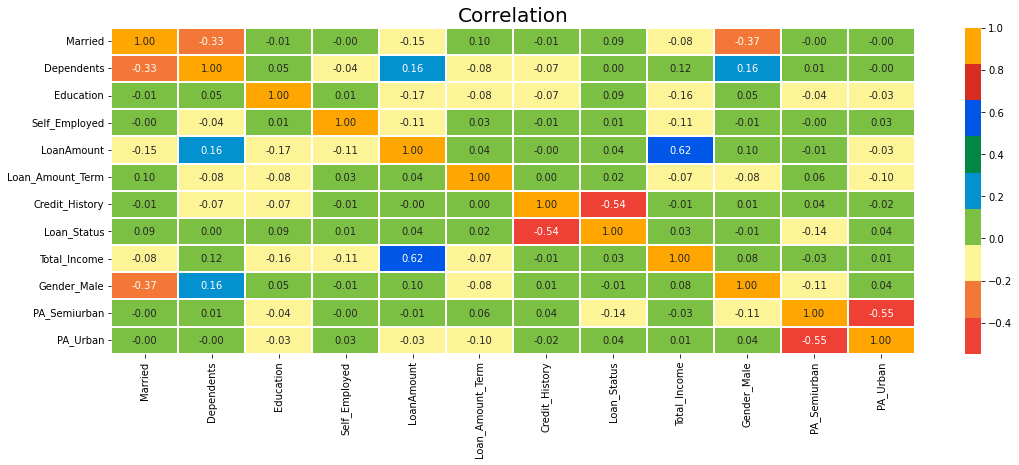

In [42]:
plt.figure(figsize=(18, 6))
plt.title('Correlation', fontsize =20)
sns.heatmap(ml_loan_data.corr(),
            cmap = colorsy,
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# Machine learning model for classification

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

from sklearn.metrics import classification_report

In [44]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_skewness=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']):
        self.feat_with_skewness = feat_with_skewness
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_skewness).issubset(df.columns)):
            # Handle skewness with cubic root transformation
            df[self.feat_with_skewness] = np.cbrt(df[self.feat_with_skewness])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df


def get_dummies(df):
    df = pd.get_dummies(df)
    return df

class MinMaxWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler_ft = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']):
        self.min_max_scaler_ft = min_max_scaler_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler_ft).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df


In [45]:
class OversampleSMOTE(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Is high risk' in df.columns:
            # SMOTE function to oversample the minority class to fix the imbalance data
            smote = SMOTE()
            X_bal, y_bal = smote.fit_resample(df.iloc[:,:-1],df.iloc[:,-1])
            X_y_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return X_y_bal
        else:
            print("Is high risk is not in the dataframe")
            return df

In [47]:
# Define the pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
preprocessor_transformer = FunctionTransformer(get_dummies)
#to_dataframe_transformer = FunctionTransformer(to_dataframe, kw_args={'columns':columns})

In [61]:
df = pd.read_csv('loan_sanction_train.csv')
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df =  df.fillna(df.mean())
df  = df.ffill().bfill()
df =  df.drop(['Loan_ID'],axis= 1)

In [100]:
df1 = df.copy()

target = df1['Loan_Status']
df1 = df1.drop(['Loan_Status'],axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,
                                              target,
                                              test_size=0.2,
                                              stratify = target,
                                              random_state = 42,
                                              )

from sklearn.preprocessing import StandardScaler, FunctionTransformer

y_train = y_train.map({'Y': 1, 'N': 0})
y_test = y_test.map({'Y': 1, 'N': 0})

In [92]:
pipeline = Pipeline([
    ('get_dummies', preprocessor_transformer),
    ('SkewnessHandler',SkewnessHandler()),
    ('MinMaxWithFeatNames',MinMaxWithFeatNames())
    


    
])

In [67]:
import numpy as np

In [101]:
X_processed = pipeline.fit_transform(X_train)
X_processed


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
154,0.237776,0.000000,0.235911,0.870775,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
239,0.240241,0.000000,0.367523,0.870775,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
448,0.241243,0.344933,0.475545,0.870775,0.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
471,0.211651,0.330192,0.405136,0.605885,0.0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0
273,0.210107,0.376457,0.475545,0.870775,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.225915,0.406121,0.464983,0.870775,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
349,0.210342,0.531328,0.535140,0.870775,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
26,0.218334,0.378143,0.423534,0.870775,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
96,0.203602,0.380865,0.452283,0.870775,1.0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0


In [102]:
X_test1 = pipeline.transform(X_test)

In [70]:
from xgboost import XGBClassifier

In [113]:
# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42)

# create a dictionary of every possible xgb parameters to search for the best parameters
xgb_params = {
    "n_estimators": [0,100,150,239, 240, 241,250,270,300,350],
    "max_depth": [2,3,4,5, 6, 7, 8, 9],
    "learning_rate": [0.001,0.01,0.05,0.1, 0.2, 0.3],
    "subsample": [0.4, 0.5, 0.7, 0.9],
    "colsample_bytree": [0.2, 0.5, 0.7, 0.9],
}

# Create a grid search object and fit it to the data to find the best parameters
grid = RandomizedSearchCV(xgb, xgb_params, cv=5, verbose=1, n_jobs=-1,n_iter=200)
grid.fit(X_processed, y_train)

# Create an XGBoost classifier with the best parameters
xgb = XGBClassifier(random_state=42, n_estimators=grid.best_params_['n_estimators'], learning_rate=grid.best_params_['learning_rate'], max_depth=grid.best_params_['max_depth'], subsample=grid.best_params_['subsample'], colsample_bytree=grid.best_params_['colsample_bytree'])

# Train the classifier
xgb.fit(X_processed, y_train)

# Make predictions using the testing data
y_pred = xgb.predict(X_test1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [115]:
# Print the best parameters found by the grid search
print("BEST PARAMETERS:\n {}".format(grid.best_params_))

# Print the accuracy, precision, recall, and F1 score of the classifier for both the training and testing data
print("\nTRAINING ACCURACY: {:.2%}".format(accuracy_score(y_train, xgb.predict(X_processed))))
print("TESTING ACCURACY: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("\nTRAINING PRECISION: {:.2%}".format(precision_score(y_train, xgb.predict(X_processed))))
print("TESTING PRECISION: {:.2%}".format(precision_score(y_test, y_pred)))
print("\nTRAINING RECALL: {:.2%}".format(recall_score(y_train, xgb.predict(X_processed))))
print("TESTING RECALL: {:.2%}".format(recall_score(y_test, y_pred)))
print("\nTRAINING F1 SCORE: {:.2%}".format(f1_score(y_train, xgb.predict(X_processed))))
print("TESTING F1 SCORE: {:.2%}".format(f1_score(y_test, y_pred)))

# Show the first 25 predictions of the classifier and their actual values in text form
print("\n[FIRST 25 PREDICTIONS]\n {}".format(y_pred[:25]))
print("\n[FIRST 25 ACTUAL VALUES]\n {}".format(y_test[:25].values))

# Print a confusion matrix for the testing data
print("\nCONFUSION MATRIX:\n {}".format(confusion_matrix(y_test, y_pred)))

BEST PARAMETERS:
 {'subsample': 0.5, 'n_estimators': 241, 'max_depth': 7, 'learning_rate': 0.001, 'colsample_bytree': 0.9}

TRAINING ACCURACY: 80.24%
TESTING ACCURACY: 85.37%

TRAINING PRECISION: 78.44%
TESTING PRECISION: 83.17%

TRAINING RECALL: 98.22%
TESTING RECALL: 98.82%

TRAINING F1 SCORE: 87.22%
TESTING F1 SCORE: 90.32%

[FIRST 25 PREDICTIONS]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1]

[FIRST 25 ACTUAL VALUES]
 [0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1]

CONFUSION MATRIX:
 [[21 17]
 [ 1 84]]


In [119]:
import joblib

In [120]:
joblib.dump(xgb, 'xgb.joblib') 

['xgb.joblib']

In [121]:
model = joblib.load('xgb.joblib')

In [124]:
print("\nCONFUSION MATRIX:\n {}".format(confusion_matrix(y_test, model.predict(X_test1))))


CONFUSION MATRIX:
 [[21 17]
 [ 1 84]]


In [116]:
fi = xgb.feature_importances_

In [118]:
imp_df = pd.DataFrame(fi, columns = ['Imp'], index =X_processed.columns ).reset_index()\
.sort_values('Imp', ascending=False)
imp_df['Imp'] = imp_df['Imp'].round(decimals = 4)
imp_df.columns = ['Features', 'Imp']

fig =px.bar(imp_df, y='Features',x='Imp', orientation='h', color='Features', 
            color_discrete_sequence=colorsy,
            template='simple_white', text_auto='True')
fig.update_layout(
    title='<b>Feature Importance</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Relative Importance</b>",
    yaxis_title="<b>Features</b>",
    legend_title='<b>Features</b>',
    legend_title_font_color="#000000",
                  plot_bgcolor ='#ffffff'
)

fig.show()